# Import Thư viện

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

# Load Data

In [78]:
book = pd.read_csv('../data/book_data.csv')


## BOOK - PROCESSING

In [79]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


In [80]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1796 non-null   int64  
 1   title           1796 non-null   object 
 2   authors         1653 non-null   object 
 3   original_price  1796 non-null   int64  
 4   current_price   1796 non-null   int64  
 5   quantity        1751 non-null   float64
 6   category        1796 non-null   object 
 7   n_review        1796 non-null   int64  
 8   avg_rating      1796 non-null   float64
 9   pages           1546 non-null   object 
 10  manufacturer    1523 non-null   object 
 11  cover_link      1796 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 168.5+ KB


# Chuẩn bị Data

### Xử lý giá trị và dữ liệu bị thiếu

In [81]:
book.isnull().sum()

product_id          0
title               0
authors           143
original_price      0
current_price       0
quantity           45
category            0
n_review            0
avg_rating          0
pages             250
manufacturer      273
cover_link          0
dtype: int64

#### Product_ID

In [82]:
book['product_id'].duplicated().sum()

np.int64(19)

In [83]:
book = book.drop_duplicates(subset=['product_id'])

xóa duplicated theo product_id là vì chắc chắn các sách có id giống nhau là bị lỗi, còn của tittle là có thể nhiều phiên bản sách được tái bản khác nhau

#### Authors

In [84]:
book['authors'].value_counts()

authors
Nguyễn Nhật Ánh       24
Higashino Keigo       20
.                     18
Thích Nhất Hạnh       16
Haruki Murakami       15
                      ..
John E. Douglas        1
William H. McRaven     1
Pauline Réage          1
@yenlamtho             1
Tố Hữu                 1
Name: count, Length: 1083, dtype: int64

có 18 '.' tên tác giả. nên ta sẽ xóa chúng đi và chuyển chúng thành ' Unknow ' 

In [85]:
book['authors'] = book['authors'].replace('.', 'Unknown')

In [86]:
book['authors'] = book['authors'].fillna('Unknown')

In [87]:
book['authors'].value_counts()

authors
Unknown               158
Nguyễn Nhật Ánh        24
Higashino Keigo        20
Thích Nhất Hạnh        16
Haruki Murakami        15
                     ... 
John E. Douglas         1
William H. McRaven      1
Pauline Réage           1
@yenlamtho              1
Andrea Hirata           1
Name: count, Length: 1083, dtype: int64

đã xử lý xong các giá trị là dấu '.' và giá trị NaN trong cột acthors và chuyển chúng thành Unknown

#### Quantity

In [88]:
book['quantity'].value_counts(dropna=False)

quantity
NaN        45
1.0        14
22.0        8
171.0       7
63.0        7
           ..
707.0       1
7737.0      1
499.0       1
2084.0      1
24668.0     1
Name: count, Length: 1190, dtype: int64

In [89]:
book.dropna(subset=['quantity'], inplace=True)

In [90]:
book['quantity'].value_counts(dropna=False)

quantity
1.0       14
22.0       8
63.0       7
2.0        7
171.0      7
          ..
4126.0     1
3406.0     1
1949.0     1
4630.0     1
3980.0     1
Name: count, Length: 1189, dtype: int64

In [91]:
book.isnull().sum()

product_id          0
title               0
authors             0
original_price      0
current_price       0
quantity            0
category            0
n_review            0
avg_rating          0
pages             233
manufacturer      264
cover_link          0
dtype: int64

#### Pages 

In [92]:
book['pages'].value_counts(dropna=False)

pages
NaN    233
200     36
192     36
280     30
352     21
      ... 
294      1
251      1
647      1
167      1
706      1
Name: count, Length: 393, dtype: int64

In [93]:
book['pages'] = pd.to_numeric(book['pages'], errors='coerce')

In [94]:
book['pages'].fillna(book['pages'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11880\1189079175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book['pages'].fillna(book['pages'].median(), inplace=True)


In [95]:
book.isnull().sum()

product_id          0
title               0
authors             0
original_price      0
current_price       0
quantity            0
category            0
n_review            0
avg_rating          0
pages               0
manufacturer      264
cover_link          0
dtype: int64

- vì pages đang ở dạng object nên ta chuyển kiểu dữ liệu của pages sang numeric 
- sau đó tiến hành điền median vào các giá trị NaN trong cột pages

In [96]:
book[book.pages > 3000]


,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
650,201687274,Có Một Nổi Buồn Vừa Ngang Qua Đây,Gã,88000,64900,114.0,Truyện ngắn - Tản văn - Tạp Văn,6,5.0,192000.0,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/08/fd/a5/0...


- cuốn sách dày nhất thế giới cũng chỉ khoảng 3,000-5,000 trang đằng này lại có tới 192000 trang @@. 
- nên ta sẽ tiến hành drop bỏ

In [97]:
book = book.query('pages < 3000')


#### Manufacturer

In [98]:
book['manufacturer'].value_counts(dropna=False)

manufacturer
NaN                                              264
Nhà Xuất Bản Thế Giới                            242
NXB Trẻ                                          144
Nhà Xuất Bản Hà Nội                              124
Nhà Xuất Bản Dân Trí                             121
Nhà Xuất Bản Kim Đồng                            111
Nhà Xuất Bản Hội Nhà Văn                         105
Nhà Xuất Bản Thanh Niên                           95
Nhà Xuất Bản Tổng hợp TP.HCM                      90
Nhà Xuất Bản Lao Động                             88
Nhà Xuất Bản Văn Học                              76
Nhà Xuất Bản Hồng Đức                             53
Nhà Xuất Bản Công Thương                          44
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              12
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Lao Động Xã Hội     

In [99]:
book['manufacturer'] = book['manufacturer'].fillna('Unknown')

ta sẽ fill các NXB có giá trị NaN bằng Unknow

In [100]:
book.isnull().sum()

product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
avg_rating        0
pages             0
manufacturer      0
cover_link        0
dtype: int64

In [101]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...


In [102]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1731 non-null   int64  
 1   title           1731 non-null   object 
 2   authors         1731 non-null   object 
 3   original_price  1731 non-null   int64  
 4   current_price   1731 non-null   int64  
 5   quantity        1731 non-null   float64
 6   category        1731 non-null   object 
 7   n_review        1731 non-null   int64  
 8   avg_rating      1731 non-null   float64
 9   pages           1731 non-null   float64
 10  manufacturer    1731 non-null   object 
 11  cover_link      1731 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 175.8+ KB


In [103]:
book['discount'] = round(1 - book['current_price'] / book['original_price'], 2)

In [104]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


tạo thêm cột discount

In [105]:
usd_to_vnd = 26313.99

book['original_price'] = (book['original_price'] / usd_to_vnd).round(2)
book['current_price'] = (book['current_price'] / usd_to_vnd).round(2)

chuyển cột discount thành 0.2, 0.3 thay vì % để phù hợp trong ML

chuyển VND sang USD

In [106]:
book.head(
)

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.10,2.46,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.27,2.28,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,7.98,4.79,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.00,1.80,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.13,3.08,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


In [107]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1731 non-null   int64  
 1   title           1731 non-null   object 
 2   authors         1731 non-null   object 
 3   original_price  1731 non-null   float64
 4   current_price   1731 non-null   float64
 5   quantity        1731 non-null   float64
 6   category        1731 non-null   object 
 7   n_review        1731 non-null   int64  
 8   avg_rating      1731 non-null   float64
 9   pages           1731 non-null   float64
 10  manufacturer    1731 non-null   object 
 11  cover_link      1731 non-null   object 
 12  discount        1730 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 189.3+ KB


kiểu dữ liệu còn chưa ổn lắm nên ta sẽ chuyển đổi chúng một tí 

In [108]:
book['title'] = book['title'].astype("string")
book['quantity'] = book['quantity'].astype("int64")
book['pages'] = book['pages'].astype("int64")
book['cover_link'] = book['cover_link'].astype("string")

tạo thêm cột Revenue để tính tổng doanh thu

In [109]:
book['revenue'] = (book['quantity'] * book['current_price']).round(2)

In [110]:
book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount,revenue
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.10,2.46,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4,130564.50
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.27,2.28,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3,18078.12
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,7.98,4.79,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4,85721.84
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.00,1.80,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4,44402.40
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.13,3.08,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4,30800.00


In [111]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 1795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1731 non-null   int64  
 1   title           1731 non-null   string 
 2   authors         1731 non-null   object 
 3   original_price  1731 non-null   float64
 4   current_price   1731 non-null   float64
 5   quantity        1731 non-null   int64  
 6   category        1731 non-null   object 
 7   n_review        1731 non-null   int64  
 8   avg_rating      1731 non-null   float64
 9   pages           1731 non-null   int64  
 10  manufacturer    1731 non-null   object 
 11  cover_link      1731 non-null   string 
 12  discount        1730 non-null   float64
 13  revenue         1731 non-null   float64
dtypes: float64(5), int64(4), object(3), string(2)
memory usage: 202.9+ KB


In [133]:
book.isnull().sum()

product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
avg_rating        0
pages             0
manufacturer      0
cover_link        0
discount          1
revenue           0
dtype: int64

có vẻ có lỗi Na gì đó ở cột Discount nên ta sẽ drop nó đi

In [134]:
book.dropna(subset=['discount'], inplace=True)

In [136]:
book.isnull().sum()

product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
avg_rating        0
pages             0
manufacturer      0
cover_link        0
discount          0
revenue           0
dtype: int64

#### Xuất data cho PowerBI

In [135]:
book.to_csv("../data/book_data_cleaned_forPowerBI.csv", index=False, encoding='utf-8-sig')

## COMMENT - PROCESSING

In [113]:
comment = pd.read_csv('../data/comments.csv')

In [114]:
comment.head()

,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


In [115]:
print(comment)

        product_id  comment_id            title  thank_count  customer_id  \
0         74021317    12559756  Cực kì hài lòng          313     22051463   
1         74021317    16979365  Cực kì hài lòng            6     27791831   
2         74021317    14069617  Cực kì hài lòng           25     17748750   
3         74021317     8569824  Cực kì hài lòng           57       410797   
4         74021317    18368714  Cực kì hài lòng            0     28545286   
...            ...         ...              ...          ...          ...   
141276    58971672    16391630  Cực kì hài lòng            0      6625296   
141277    58971672    12767000  Cực kì hài lòng            0     16435374   
141278    58971672    16322348  Cực kì hài lòng            0     10549708   
141279    58971672    16288080  Cực kì hài lòng            0     14487833   
141280    58971672    16204880  Cực kì hài lòng            0     27440114   

        rating                                            content  
0      

In [116]:
comment.shape

(141281, 7)

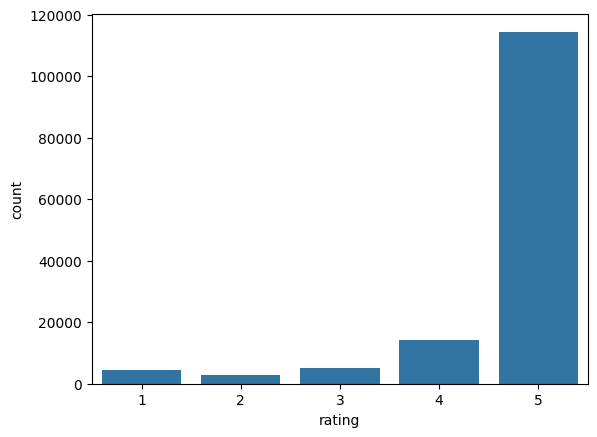

In [117]:
sns.countplot(x = comment.rating);

In [118]:
comment.isnull().sum()

product_id         0
comment_id         0
title              4
thank_count        0
customer_id        0
rating             0
content        38018
dtype: int64

In [119]:
comment.duplicated().sum()

np.int64(19888)

- trước hết ta sẽ xóa null của title và content
- tiếp theo là xóa giá trị duplicated

In [120]:
comment = comment.dropna(subset=['title', 'content'])

In [121]:
print("Data sau khi xóa null:")
comment.isnull().sum()

Data sau khi xóa null:


product_id     0
comment_id     0
title          0
thank_count    0
customer_id    0
rating         0
content        0
dtype: int64

In [122]:
comment['comment_id'].duplicated().sum()


np.int64(17264)

- ta sẽ không xóa có duplicated trong cột product_id bởi vì một sản phẩm có thể có nhiều comment
- vì mỗi comment_id tương ứng với 1 comment nên chỉ cần xóa giá trị duplicated trong comment_id thôi là được

In [123]:
dup_cmt = comment[comment['comment_id'].duplicated(keep=False)] \
               .sort_values('comment_id')

dup_cmt.head(10)

,product_id,comment_id,title,thank_count,customer_id,rating,content
68691,427529,224954,Nhẹ nhàng,0,129176,4,Những nụ hôn điện ảnh đã vén một thế giới sau ...
68681,427529,224954,Nhẹ nhàng,0,129176,4,Những nụ hôn điện ảnh đã vén một thế giới sau ...
86822,435458,227556,Hay,0,129176,4,Cuốn sách đã thể hiện được tài năng tuyệt vời ...
86812,435458,227556,Hay,0,129176,4,Cuốn sách đã thể hiện được tài năng tuyệt vời ...
127498,427631,231723,Một nhà lãnh đạo kiệt xuất,0,596779,5,Một cuốn sách thu hút được người đọc ngay từ n...
127488,427631,231723,Một nhà lãnh đạo kiệt xuất,0,596779,5,Một cuốn sách thu hút được người đọc ngay từ n...
127486,427631,283483,Tâm huyết,0,581993,5,Tác phẩm dành cho những người quan tâm đến kin...
127496,427631,283483,Tâm huyết,0,581993,5,Tác phẩm dành cho những người quan tâm đến kin...
127495,427631,292363,SÁCH RẤT HAY!,2,660186,5,"Bây giờ gần như cái gì có gắn chữ ""DUBAI"" đều ..."
127485,427631,292363,SÁCH RẤT HAY!,2,660186,5,"Bây giờ gần như cái gì có gắn chữ ""DUBAI"" đều ..."


ta sẽ xem thử một vài dòng duplicated

In [124]:
comment = comment.drop_duplicates(subset=['comment_id'], keep='first')


In [125]:
print("Sau khi xóa duplicated comment_id:")
print(comment['comment_id'].duplicated().sum())

Sau khi xóa duplicated comment_id:
0


In [126]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85995 entries, 0 to 141277
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   85995 non-null  int64 
 1   comment_id   85995 non-null  int64 
 2   title        85995 non-null  object
 3   thank_count  85995 non-null  int64 
 4   customer_id  85995 non-null  int64 
 5   rating       85995 non-null  int64 
 6   content      85995 non-null  object
dtypes: int64(5), object(2)
memory usage: 5.2+ MB


In [127]:
# 1. Loại bỏ khoảng trắng thừa đầu - cuối (strip)
comment['title'] = comment['title'].astype(str).str.strip()
comment['content'] = comment['content'].astype(str).str.strip()

# 2. Lowercase
comment['title'] = comment['title'].str.lower()
comment['content'] = comment['content'].str.lower()

# 3. Loại bỏ URL
comment['content'] = comment['content'].apply(lambda x: re.sub(r'http\S+|www\.\S+', ' ', x))

# 4. Loại bỏ ký tự đặc biệt nhưng **GIỮ dấu tiếng Việt**
pattern = r'[^\w\sáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệ' \
          r'íìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữự' \
          r'ýỳỷỹỵđ]'
comment['content'] = comment['content'].apply(lambda x: re.sub(pattern, ' ', x))

# 5. Gọn khoảng trắng giữa các từ
comment['content'] = comment['content'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 6. Xóa dòng content rỗng sau khi clean
comment = comment[comment['content'] != ""]

Xử lý text content 

In [128]:
print(f"Số dòng còn lại sau khi clean: {len(comment)}")
comment.head()

Số dòng còn lại sau khi clean: 85704


,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,cực kì hài lòng,313,22051463,5,có những người bước đến họ lấp đầy hạnh phúc v...
1,74021317,16979365,cực kì hài lòng,6,27791831,5,thấy nhiều bạn chê tiki gói hàng quá may sao h...
2,74021317,14069617,cực kì hài lòng,25,17748750,5,bìa cực xinh tiki giao hàng nhanh sách không b...
3,74021317,8569824,cực kì hài lòng,57,410797,5,sách lúc nhận hình thức rất ổn không cong vênh...
4,74021317,18368714,cực kì hài lòng,0,28545286,5,một cuốn sách rất đáng đọc về tình yêu thương ...


tiếp theo ta sẽ gán sentiment cho theo rating, ở đây tôi sẽ thực hiện dán rating theo 2 phương pháp Rule-based(dán theo rating) và PhoBERT(dán theo AI). 2 thư viện này dùng cho tiếng Việt. sau khi gán tôi sẽ tiến hành cho sánh

In [129]:
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "Negative"
    elif r == 3:
        return "Neutral"
    elif r in [4, 5]:
        return "Positive"

comment["sentiment_rule"] = comment["rating"].apply(rating_to_sentiment)

In [130]:
comment["sentiment_rule"].value_counts()


sentiment_rule
Positive    75713
Negative     5665
Neutral      4326
Name: count, dtype: int64

ta sẽ kiểm tra phân bố của sentiment_rule

In [131]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "wonrax/phobert-base-vietnamese-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_phobert = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=-1  # CPU, nếu bạn có GPU (Colab) thì đổi thành 0
)


KeyboardInterrupt: 

In [ ]:
def predict_phobert_batch(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        out = sentiment_phobert(batch, truncation=True, max_length=256)
        results.extend(out)
    return results


In [ ]:
texts = comment["content"].tolist()
phobert_results = predict_phobert_batch(texts)

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

In [ ]:
# 5) Thêm cột sentiment PhoBERT vào DataFrame
label_map = {"POS": "Positive", "NEU": "Neutral", "NEG": "Negative"}

comment["sentiment_phobert_score"] = [r["score"] for r in phobert_results]
comment["sentiment_phobert"] = [label_map[r["label"]] for r in phobert_results]


In [ ]:
comment.to_csv("../data/comment_cleaned.csv", index=False, encoding="utf-8-sig")

print("Hoàn tất ✔ File đã lưu: ../data/comment_cleaned.csv")

Hoàn tất ✔ File đã lưu: ../data/comment_cleaned.csv
